In [1]:
from Corpus import Corpus as c
import pickle

corpus = c.Corpus(loadFromPath="../pickle/temp/test")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [2]:
corpus.getSentimentForText("Falling in love with the first trailer for Taylor Swift's Miss Americana documentary has ruined the life of 8 people - The A.V. Club")

'negative'

In [3]:
df = corpus.toDataframe()

In [5]:
[perplexity, coherence] = corpus.assessLDA()
print("Perplexity: " + str(perplexity))

Perplexity: -6.210927376692945


In [ ]:
df[df["raw"].str.contains("Swift")]

,raw,tokens,topic,date,source
5315,Taylor Swift's new song 'Carolina' based on De...,"[taylor, swift, new, song, carolina, based, de...",2,2022-06-26 12:06:03,foxnews.com
7437,"Meet Gracie Abrams, the pop singer with fans i...","[meet, gracie, abrams, pop, singer, fan, taylo...",2,2022-06-28 18:42:39,independent.co.uk


In [ ]:
# import dask.dataframe as dd

# daskDF = dd.from_pandas(df, npartitions=4)

# daskDF["s"] = daskDF["raw"].apply(corpus.getSentimentForText)

# dfResult = daskDF.compute()


[{'label': 'neutral', 'score': 0.9998759031295776}]
[{'label': 'neutral', 'score': 0.9998759031295776}]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/dataframe/core.py:4559: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('raw', 'object'))

  warnings.warn(meta_warning(meta))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


[{'label': 'positive', 'score': 0.9838558435440063}][{'label': 'neutral', 'score': 0.999842643737793}]

[{'label': 'neutral', 'score': 0.9998774528503418}]
[{'label': 'neutral', 'score': 0.9998877048492432}]
[{'label': 'neutral', 'score': 0.9998670816421509}]
[{'label': 'neutral', 'score': 0.964509904384613}]
[{'label': 'neutral', 'score': 0.9998852014541626}]
[{'label': 'positive', 'score': 0.8558692932128906}]
[{'label': 'negative', 'score': 0.9200215339660645}]
[{'label': 'positive', 'score': 0.9961418509483337}]
[{'label': 'negative', 'score': 0.9457838535308838}]
[{'label': 'neutral', 'score': 0.9998679161071777}]
[{'label': 'neutral', 'score': 0.7312619090080261}]
[{'label': 'neutral', 'score': 0.9997909665107727}]
[{'label': 'positive', 'score': 0.9956138134002686}]
[{'label': 'neutral', 'score': 0.9998753070831299}]
[{'label': 'neutral', 'score': 0.9998877048492432}]
[{'label': 'neutral', 'score': 0.8034765720367432}]
[{'label': 'neutral', 'score': 0.9997370839118958}]
[{'label

In [ ]:
dfResult[dfResult["s"] == "negative"]

,raw,tokens,topic,date,source,s
6,Taylor Swift responds to critics after jet top...,"[taylor, swift, responds, critic, jet, top, wo...",None,2022-07-31 19:19:29,foxnews.com,negative
7,Taylor Swift's rep calls private-jet report 'b...,"[taylor, swift, rep, call, privatejet, report,...",None,2022-08-02 07:45:10,inquirer.com,negative
8,Representatives for US singer Taylor Swift hit...,"[representative, u, singer, taylor, swift, hit...",None,2022-08-03 10:57:01,irishnews.com,negative
9,"Taylor Swift, Drake and Kylie Jenner have priv...","[taylor, swift, drake, kylie, jenner, private,...",None,2022-08-08 16:59:16,nbcnews.com,negative
67,Taylor Swift fans are fuming as singer uses th...,"[taylor, swift, fan, fuming, singer, us, word,...",None,2022-10-27 13:31:12,joe.co.uk,negative
...,...,...,...,...,...,...
628,F1 commentators drop Taylor Swift references d...,"[f1, commentator, drop, taylor, swift, referen...",None,2023-05-03 04:07:28,indy100.com,negative
631,F1 commentators drop Taylor Swift references d...,"[f1, commentator, drop, taylor, swift, referen...",None,2023-05-03 14:50:55,indy100.com,negative
641,F1 fans devastated for Alonso as rumoured girl...,"[f1, fan, devastated, alonso, rumoured, girlfr...",None,2023-05-04 12:55:04,thesun.ie,negative
709,Taylor Swift's Nashville show delayed for four...,"[taylor, swift, nashville, show, delayed, four...",None,2023-05-08 11:40:32,metro.co.uk,negative


<AxesSubplot: xlabel='source'>

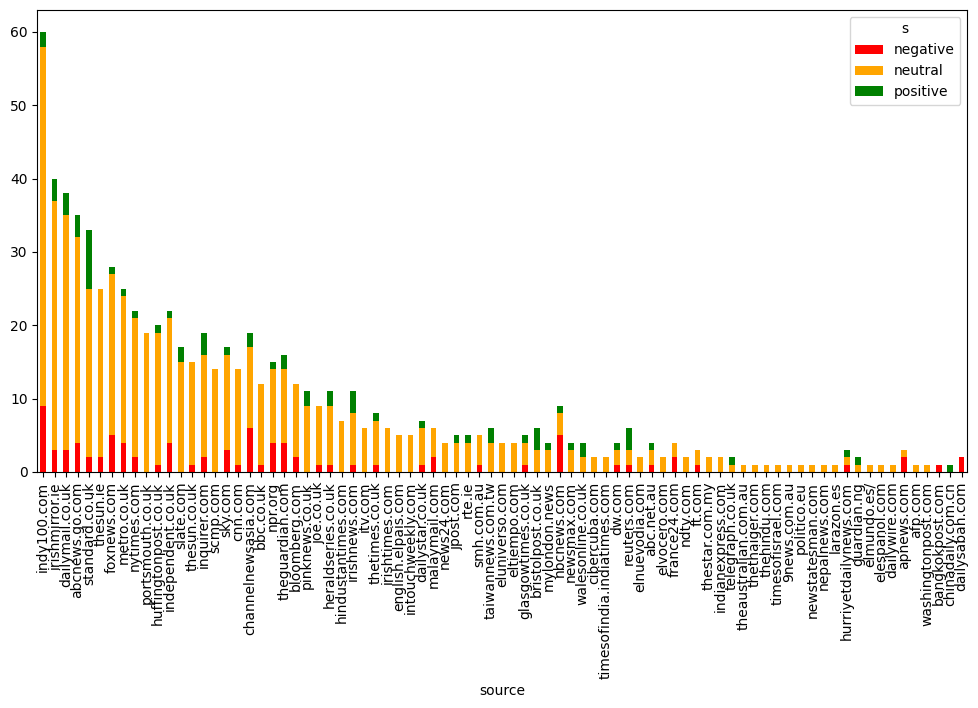

In [ ]:
# dfResult[dfResult["s"] != "neutral"].groupby('source')['s'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 6), color={'negative': 'red', 'positive': 'green'})


counts = dfResult.groupby('source')['s'].value_counts().unstack()

# Sort by 'positive' counts
sorted_counts = counts.sort_values('neutral', ascending=False)

# Plot
sorted_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color={'negative': 'red', 'positive': 'green', 'neutral': 'orange'})

NameError: name 'corpus' is not defined